In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def to_pixel_arrays(my_df, activation_threshold=0, x_dimension=16, y_dimension=16):
    pixel_arrays_flat = my_df.to_numpy() 
    num_activated_pixels = np.sum((pixel_arrays_flat > activation_threshold), axis=1)
    pixel_arrays = pixel_arrays_flat.reshape(-1, y_dimension, x_dimension) 
    x_sizes = np.sum(np.any(pixel_arrays > activation_threshold, axis=1), axis=1) 
    y_sizes = np.sum(np.any(pixel_arrays > activation_threshold, axis=2), axis=1)
    
    return pixel_arrays_flat, pixel_arrays, num_activated_pixels, x_sizes, y_sizes

In [3]:
labels_df = pd.read_parquet(glob.glob('/data/dajiang/smart-pixels/largerWindowPreliminary/dataset_2s_16x16_50x12P5_parquets/unflipped/labels*.parquet'))
recon2D_df = pd.read_parquet(glob.glob('/data/dajiang/smart-pixels/largerWindowPreliminary/dataset_2s_16x16_50x12P5_parquets/unflipped/recon2D*.parquet'))

In [4]:
labels_df_2 = pd.read_parquet(glob.glob('/data/dajiang/smart-pixels/dataset_2s/dataset_2s_50x12P5_parquets/unflipped/labels*.parquet'))
recon2D_df_2 = pd.read_parquet(glob.glob('/data/dajiang/smart-pixels/dataset_2s/dataset_2s_50x12P5_parquets/unflipped/recon2D*.parquet'))

In [5]:
len(labels_df[labels_df['original_atEdge']==True])

668267

In [6]:
f = open('plots/dataset_2s_16x16_plots/event_stats.txt', 'w')
f.write(f'Total number of events: {len(labels_df)} events\n')
f.write(f'Number of "original_atEdge == True" events: {len(labels_df[labels_df["original_atEdge"]==True])} events\n')
f.close()

In [7]:
labels_df

,x-entry,y-entry,z-entry,n_x,n_y,n_z,number_eh_pairs,y-local,pt,cotAlpha,cotBeta,y-midplane,x-midplane,original_atEdge
0,61.985603,-8.061157,100.0,0.162602,-0.026071,-0.366574,10601.0,-0.733310,0.3675,-0.443572,0.071121,-11.617192,84.164208,False
1,23.118940,-24.601223,100.0,-0.579516,0.019308,-0.514138,11147.0,0.128796,-0.5145,1.127160,-0.037554,-22.723517,-33.239081,False
2,-154.792755,-23.144194,100.0,2.078584,0.074950,-0.439151,46532.0,3.931880,-0.4455,-4.733187,-0.170670,-14.610683,81.866617,False
3,-18.350645,-9.696522,100.0,0.618981,-0.093143,-0.453024,13223.0,-5.004160,0.4625,-1.366332,0.205603,-19.976662,49.965934,False
4,231.262909,17.544825,100.0,-5.112319,-0.346054,-1.330225,28960.0,-7.395340,1.3745,3.843199,0.260147,4.537477,39.102974,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,336.211273,18.589785,100.0,-5.929424,-0.081128,-1.019278,52657.0,-2.895800,-1.0225,5.817279,0.079594,14.610105,45.347348,False
24978,190.661713,-19.547895,100.0,-1.809063,0.012523,-0.490341,28588.0,-0.280095,-0.4905,3.689398,-0.025539,-18.270927,6.191824,False
24979,435.101837,-10.194023,100.0,-7.719026,0.071199,-0.907712,72115.0,1.785980,-0.9105,8.503827,-0.078438,-6.272129,9.910477,True
24980,-128.354492,-13.927855,100.0,1.677599,-0.015227,-0.375190,38326.0,0.149770,0.3755,-4.471332,0.040585,-15.957094,95.212101,False


/tmp/ipykernel_1719025/2015347970.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


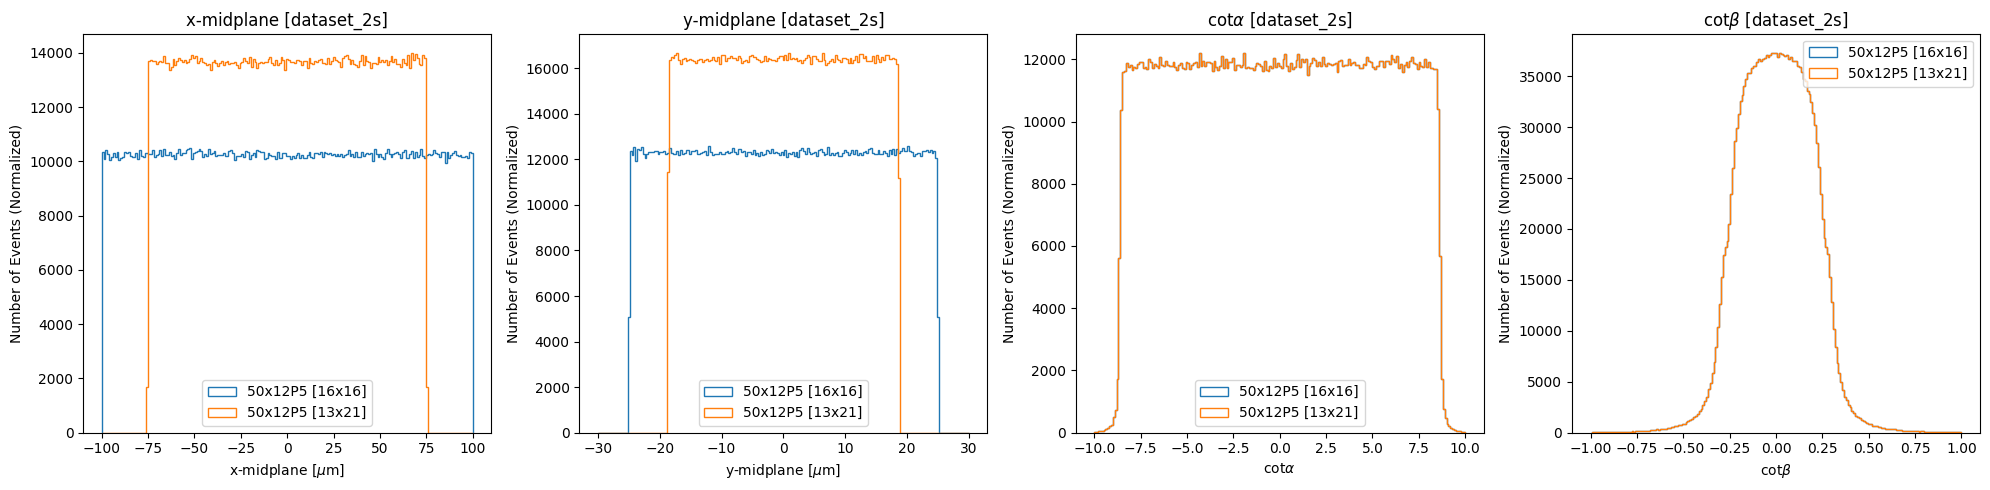

In [8]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

ax[0].hist(labels_df['x-midplane'], bins=np.linspace(-100,100,200), histtype='step', label='50x12P5 [16x16]')
ax[0].hist(labels_df_2['x-midplane'], bins=np.linspace(-100,100,200), histtype='step', label='50x12P5 [13x21]')
ax[0].set_title(r'x-midplane [dataset_2s]')
ax[0].set_xlabel(r'x-midplane [$\mu$m]')
ax[0].set_ylabel(r'Number of Events (Normalized)')
ax[0].legend()

ax[1].hist(labels_df['y-midplane'], bins=np.linspace(-30,30,200), histtype='step', label='50x12P5 [16x16]')
ax[1].hist(labels_df_2['y-midplane'], bins=np.linspace(-30,30,200), histtype='step', label='50x12P5 [13x21]')
ax[1].set_title(r'y-midplane [dataset_2s]')
ax[1].set_xlabel(r'y-midplane [$\mu$m]')
ax[1].set_ylabel(r'Number of Events (Normalized)')
ax[1].legend()

ax[2].hist(labels_df['cotAlpha'], bins=np.linspace(-10,10,200), histtype='step', label='50x12P5 [16x16]')
ax[2].hist(labels_df['cotAlpha'], bins=np.linspace(-10,10,200), histtype='step', label='50x12P5 [13x21]')
ax[2].set_title(r'cot$\alpha$ [dataset_2s]')
ax[2].set_xlabel(r'cot$\alpha$')
ax[2].set_ylabel(r'Number of Events (Normalized)')
ax[2].legend()

ax[3].hist(labels_df['cotBeta'], bins=np.linspace(-1,1,200), histtype='step', label='50x12P5 [16x16]')
ax[3].hist(labels_df['cotBeta'], bins=np.linspace(-1,1,200), histtype='step', label='50x12P5 [13x21]')
ax[3].set_title(r'cot$\beta$ [dataset_2s]')
ax[3].set_xlabel(r'cot$\beta$')
ax[3].set_ylabel(r'Number of Events (Normalized)')
ax[3].legend()

fig.tight_layout()
fig.savefig('plots/dataset_2s_16x16_plots/50x12P5_labels_vs_13x21.png', dpi=300)
fig.show()

/tmp/ipykernel_1719025/3218654878.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


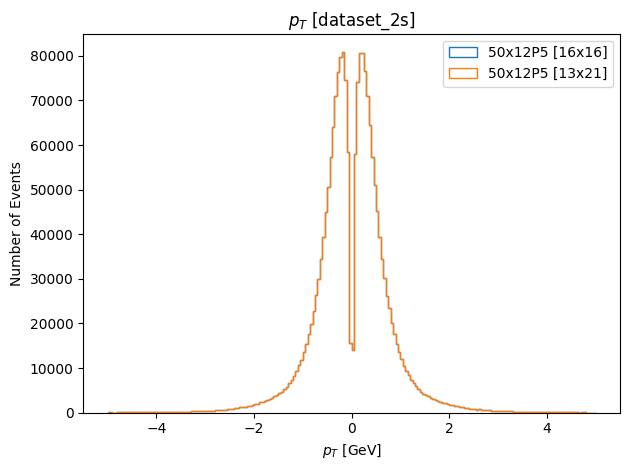

In [9]:
fig, ax = plt.subplots()

ax.hist(labels_df['pt'], bins=200, histtype='step', label='50x12P5 [16x16]')
ax.hist(labels_df['pt'], bins=200, histtype='step', label='50x12P5 [13x21]')
ax.legend()
ax.set_title(r'$p_T$ [dataset_2s]')
ax.set_xlabel(r'$p_T$ [GeV]')
ax.set_ylabel(r'Number of Events')
fig.tight_layout()
fig.savefig('plots/dataset_2s_16x16_plots/50x12P5_pt_vs_13x21.png', dpi=300)
fig.show()

In [10]:
original_atEdge_fraction = sum(labels_df['original_atEdge'])/len(labels_df['original_atEdge'])
print(original_atEdge_fraction)

0.3275438098613053


In [11]:
recon2D_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
pixel_arrays_flat, pixel_arrays, num_activated_pixels, x_sizes, y_sizes = to_pixel_arrays(recon2D_df, 400, x_dimension=16, y_dimension=16)

In [13]:
pixel_arrays_flat2, pixel_arrays2, num_activated_pixels2, x_sizes2, y_sizes2 = to_pixel_arrays(recon2D_df_2, 400, x_dimension=21, y_dimension=13)

/tmp/ipykernel_1719025/1913762857.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


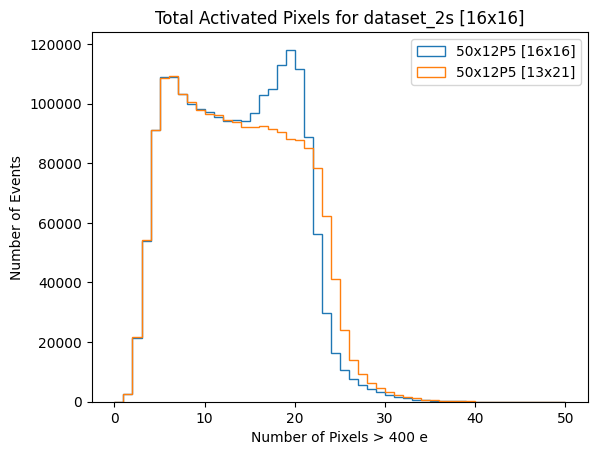

In [14]:
fig, ax = plt.subplots()

ax.hist(num_activated_pixels, bins=np.linspace(0,50,51), histtype='step', label='50x12P5 [16x16]')
ax.hist(num_activated_pixels2, bins=np.linspace(0,50,51), histtype='step', label='50x12P5 [13x21]')
ax.legend()
ax.set_xlabel('Number of Pixels > 400 e')
ax.set_ylabel('Number of Events')
ax.set_title('Total Activated Pixels for dataset_2s [16x16]')
fig.savefig('plots/dataset_2s_16x16_plots/50x12P5_num_activated_pixels_vs_13x21.png', dpi=300)
fig.show()

/tmp/ipykernel_1719025/833313690.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


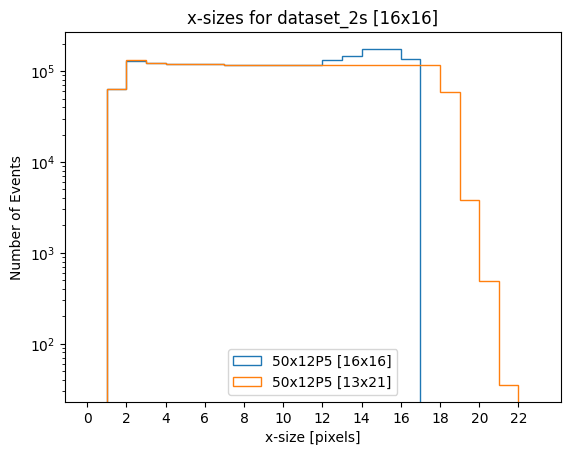

In [15]:
fig, ax = plt.subplots()

ax.hist(x_sizes, bins=np.linspace(0,23,24), histtype='step', label='50x12P5 [16x16]')
ax.hist(x_sizes2, bins=np.linspace(0,23,24), histtype='step', label='50x12P5 [13x21]')
ax.legend()
ax.set_yscale('log')
ax.set_xticks(np.arange(0,24,2))
ax.set_xlabel('x-size [pixels]')
ax.set_ylabel('Number of Events')
ax.set_title('x-sizes for dataset_2s [16x16]')
fig.savefig('plots/dataset_2s_16x16_plots/50x12P5_x_size_vs_13x21.png', dpi=300)
fig.show()

/tmp/ipykernel_1719025/3104932009.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


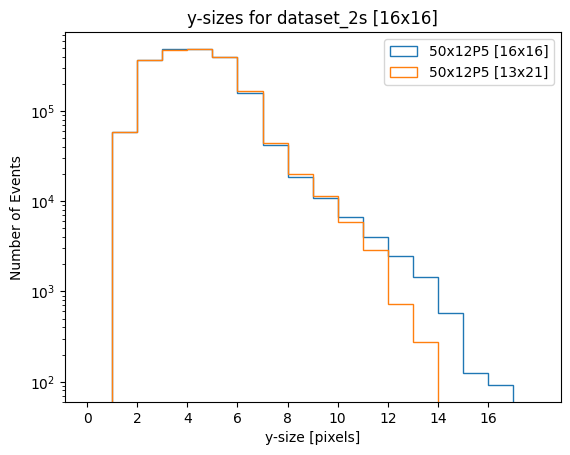

In [16]:
fig, ax = plt.subplots()

ax.hist(y_sizes, bins=np.linspace(0,18,19), histtype='step', label='50x12P5 [16x16]')
ax.hist(y_sizes2, bins=np.linspace(0,18,19), histtype='step', label='50x12P5 [13x21]')
ax.set_yscale('log')
ax.legend()
ax.set_xticks(np.arange(0,18,2))
ax.set_xlabel('y-size [pixels]')
ax.set_ylabel('Number of Events')
ax.set_title('y-sizes for dataset_2s [16x16]')
fig.savefig('plots/dataset_2s_16x16_plots/50x12P5_y_size_vs_13x21.png', dpi=300)
fig.show()